### Regularized logistic regression

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


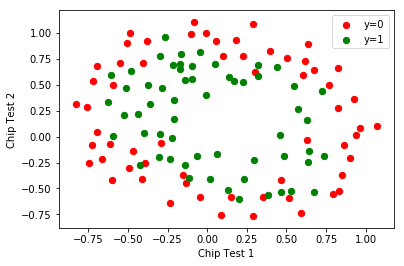

In [1]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

import matplotlib.pyplot as plt
import plot_utils

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
#plt.savefig('fig3.pdf')
plt.show()


         Current function value: 0.603122
         Iterations: 12
         Function evaluations: 101
         Gradient evaluations: 89
Theta found by fmin_bfgs:  [ 0.69040597  0.23177986  0.57445042 -1.04749721 -0.29900447 -0.59126662
 -0.0414026  -0.14411314 -0.13865499 -0.16785855 -0.80106548 -0.02789209
 -0.28248396 -0.07558128 -0.64517376 -0.20846201 -0.09560189 -0.03953498
 -0.12030338 -0.10410162 -0.39117593 -0.60092927 -0.00238938 -0.14149109
  0.00178734 -0.154761   -0.03487405 -0.61801957]
Final loss =  0.544247178501


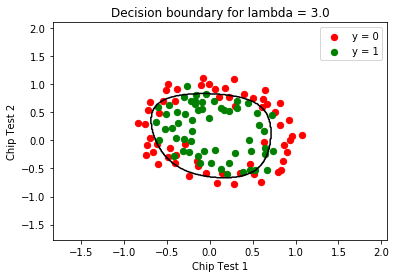

In [6]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 1.0
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print 'Theta found by fmin_bfgs: ',theta_opt
print "Final loss = ", reg_lr1.loss(theta_opt,XX,y,0.0)

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
#plt.savefig('fig4.pdf')
plt.show()


In [3]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)

# TODO: fill in the expression for accuracy of prediction
accuracy = float((predy == y).sum()) / len(y)
print "Accuracy on the training set = ", accuracy

Accuracy on the training set =  0.830508474576


### Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg:  [  5.89106253e-01   1.95454002e-01   5.58913807e-01  -9.86107898e-01
  -3.61900628e-01  -5.82750147e-01  -2.51639321e-02  -1.58019487e-01
  -1.59981994e-01  -1.45612675e-01  -7.58932186e-01  -3.41689773e-02
  -2.88651654e-01  -9.74950793e-02  -6.16273324e-01  -1.80925636e-01
  -9.79992358e-02  -4.05896085e-02  -1.27023699e-01  -1.16537109e-01
  -3.39110258e-01  -5.60445739e-01   5.57877067e-05  -1.43900969e-01
   5.69591879e-04  -1.57722446e-01  -4.39086378e-02  -5.60735202e-01]
Loss with sklearn theta:  0.549552378642


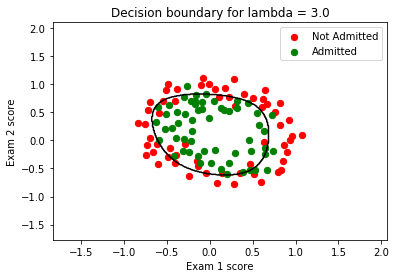

Accuracy on the training set =  0.822033898305


In [7]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg = 1.0

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print "Theta found by sklearn with L2 reg: ", sk_logreg_l2.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0)

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
#plt.savefig('fig4_sk_reg_1.pdf')
plt.show()

predy_sk = sk_logreg_l2.predict(XX)

## TODO: fill in the expression for accuracy of prediction
accuracy_sk = float((predy_sk == y).sum()) / len(y)
print "Accuracy on the training set = ", accuracy_sk

### L1 regularized logistic regre

Theta found by sklearn with L1 reg:  [ 1.86938004  0.68647306  1.2802771  -4.86209988 -1.621561   -2.34112724
  0.          0.          0.          0.          0.          0.          0.
  0.         -2.36834977  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.        ]
Loss with sklearn theta:  0.43815969281
Computing regularization path ...


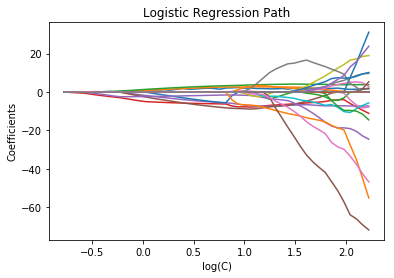

In [5]:
# L1 regularization witk sklearn LogisticRegression

sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print "Theta found by sklearn with L1 reg: ", sk_logreg_l1.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0)

# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y)
#plt.savefig('fig5.pdf')
plt.show()
